In [1]:
import glob, os
from os import listdir
from os.path import isfile, join
import fnmatch
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np
import pandas as pd
import astropy

In [2]:
print(astropy.__version__)
import lightkurve as lk

3.1.2


In [3]:
#------------------------------Finding Downloaded TESS Data Files --------------------------------------
path = '/Users/felizd/Desktop/Felix/TESSdata/' #location of where I put downloaded files

data = [os.path.join(dirpath, f) # an array of path names to be looped over
    for dirpath, dirnames, files in os.walk(path) #recursively searches through directory
    for f in fnmatch.filter(files, '*.lc')] #finds every file (*) that ends with .lc

print ("number of files: ",len(data)) #number of files)

for d in range(len(data)):
    print ("data set #", d+1 ," : ", data[d]) #I added the d+1 because python does zero-indexing (https://en.wikipedia.org/wiki/Zero-based_numbering)
    print ("")

number of files:  12
data set # 1  :  /Users/felizd/Desktop/Felix/TESSdata/147284933_sector01_1_1.lc

data set # 2  :  /Users/felizd/Desktop/Felix/TESSdata/180412528_sector01_3_3.lc

data set # 3  :  /Users/felizd/Desktop/Felix/TESSdata/220408233_sector01_4_1.lc

data set # 4  :  /Users/felizd/Desktop/Felix/TESSdata/220481232_sector01_4_1.lc

data set # 5  :  /Users/felizd/Desktop/Felix/TESSdata/220561605_sector01_3_4.lc

data set # 6  :  /Users/felizd/Desktop/Felix/TESSdata/231835378_sector01_3_1.lc

data set # 7  :  /Users/felizd/Desktop/Felix/TESSdata/234517168_sector01_3_1.lc

data set # 8  :  /Users/felizd/Desktop/Felix/TESSdata/270673133_sector01_4_4.lc

data set # 9  :  /Users/felizd/Desktop/Felix/TESSdata/382633618_sector01_3_4.lc

data set # 10  :  /Users/felizd/Desktop/Felix/TESSdata/38459760_sector01_4_1.lc

data set # 11  :  /Users/felizd/Desktop/Felix/TESSdata/38466740_sector01_4_1.lc

data set # 12  :  /Users/felizd/Desktop/Felix/TESSdata/394285684_sector01_3_3.lc



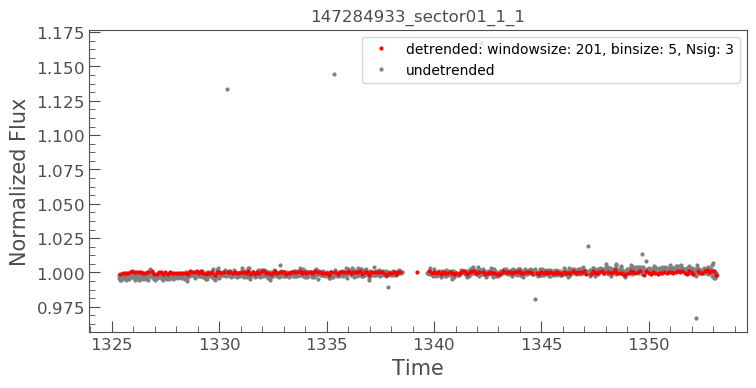

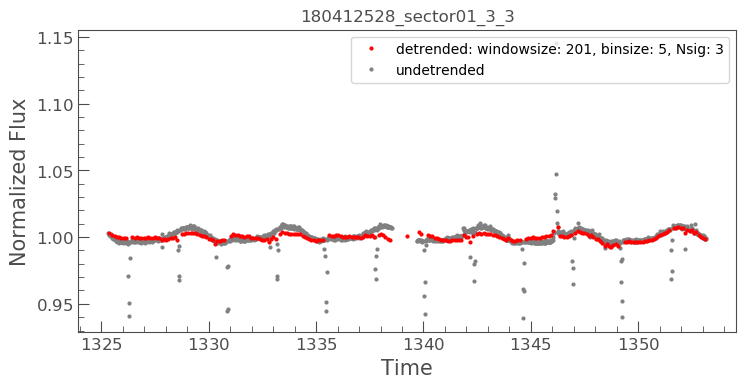

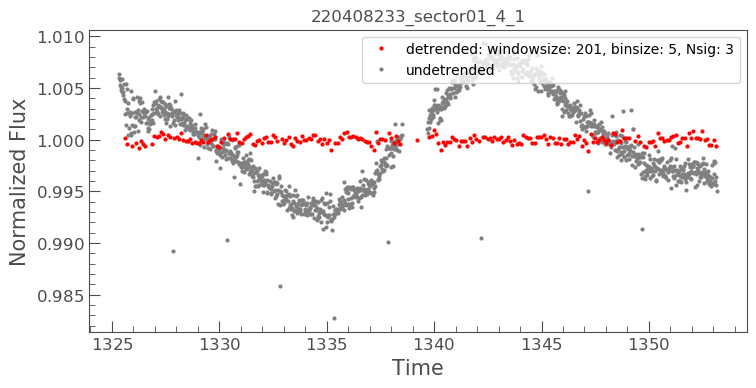

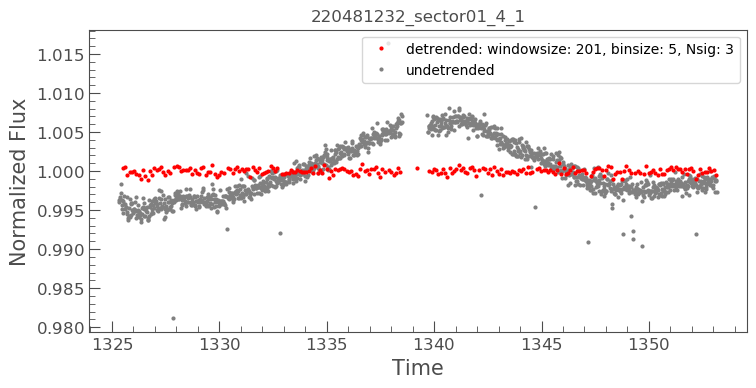

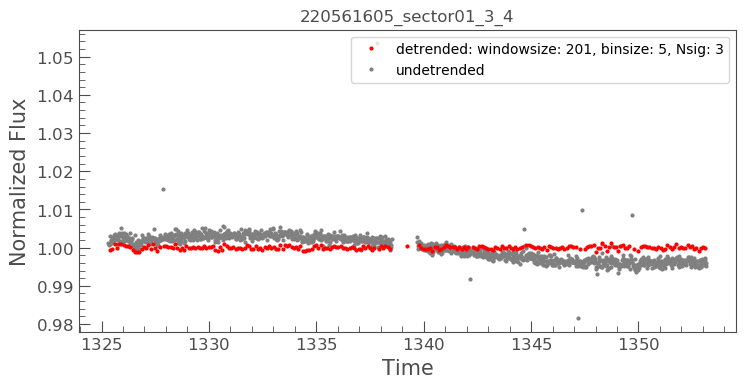

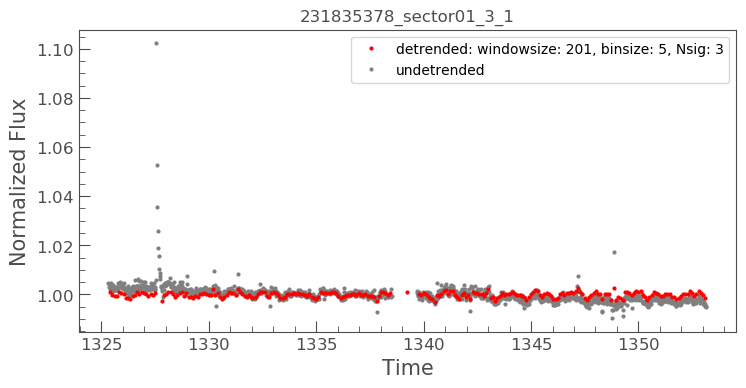

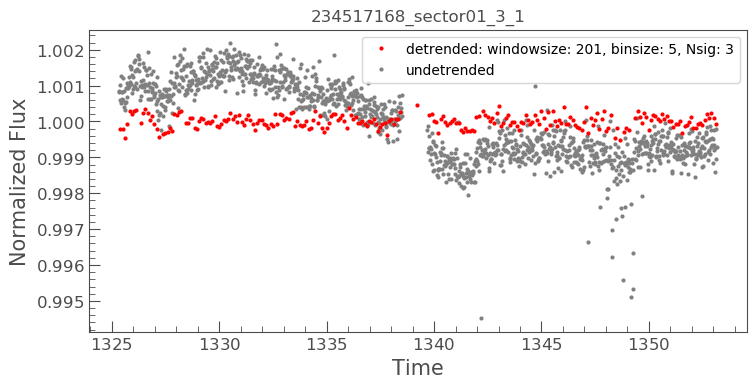

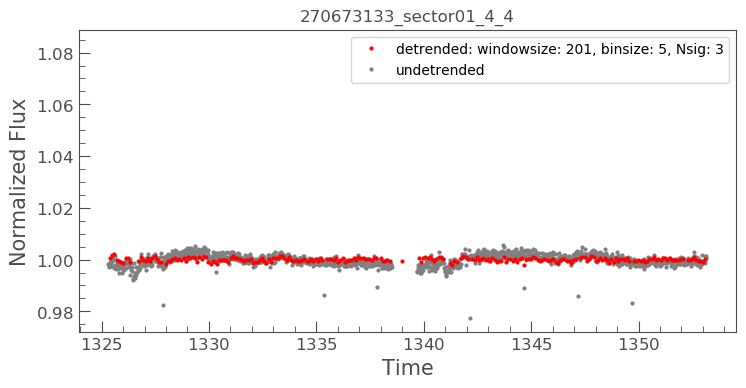

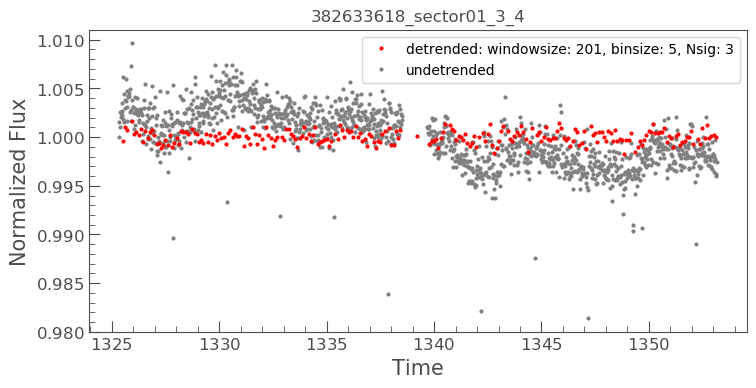

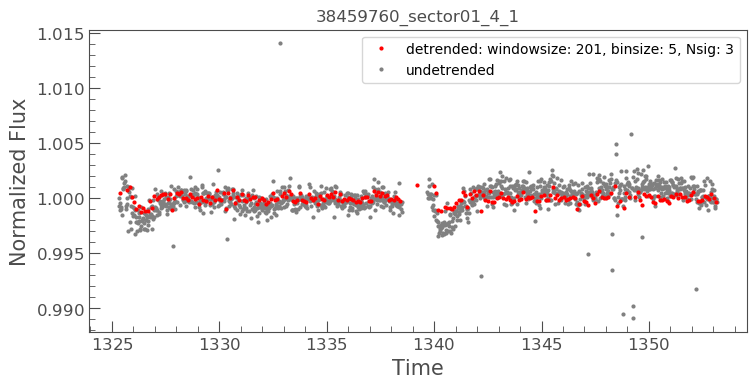

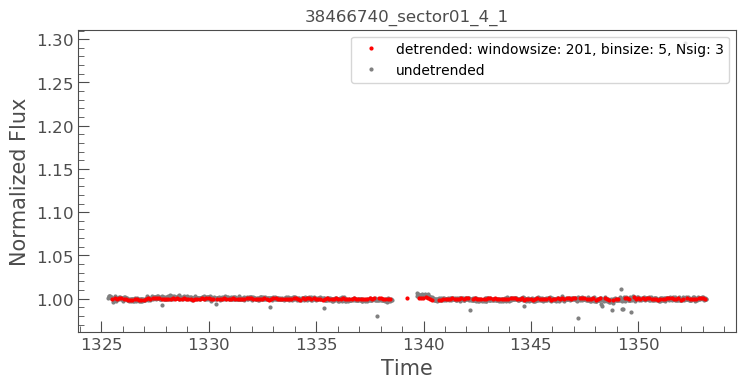

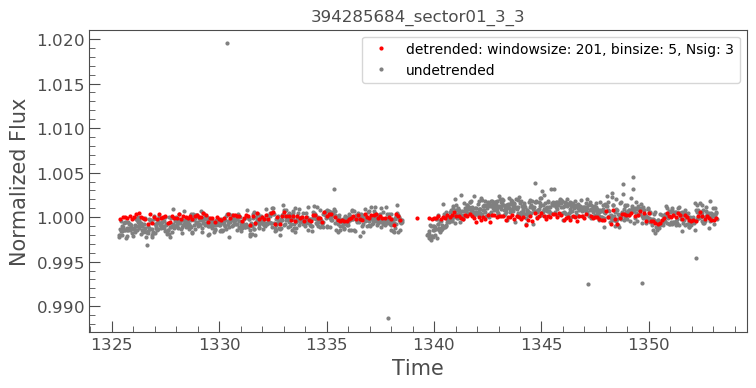

In [35]:
Nsig=3; bin_size=5; window_size=201
for d in range(len(data)): #creating a for loop to show light curve figures for all files
    time     = np.transpose(np.loadtxt(data[d]))[0] #first  (zero indexing in python) column 
    mag      = np.transpose(np.loadtxt(data[d]))[1] #second (zero indexing in python) column 
    magerror = np.transpose(np.loadtxt(data[d]))[2] #third (zero indexing in python) column 
    

    flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
    fluxerror = flux*(10.0**(magerror/2.5)-1.0)

    lc = lk.LightCurve(time,flux,fluxerror)
    detrended_lc = lc.flatten(window_length=window_size).bin(binsize=bin_size).remove_outliers(sigma=Nsig)
    detrended_lc.plot(c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig));
    plt.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
    plt.legend(loc='upper right')
    plt.title(str(data[d][37:-3]))
    plt.show()
    print( "") #adds space between figures

run BLS


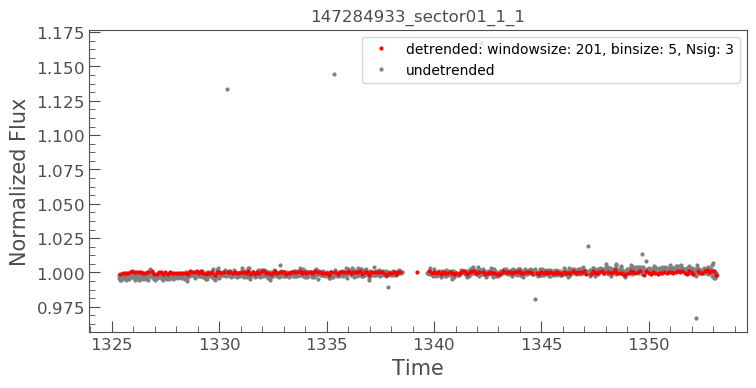

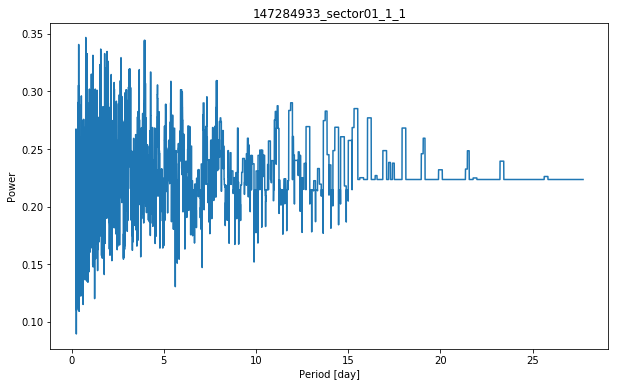

No handles with labels found to put in legend.


Best Fit Period: 0.7700 days


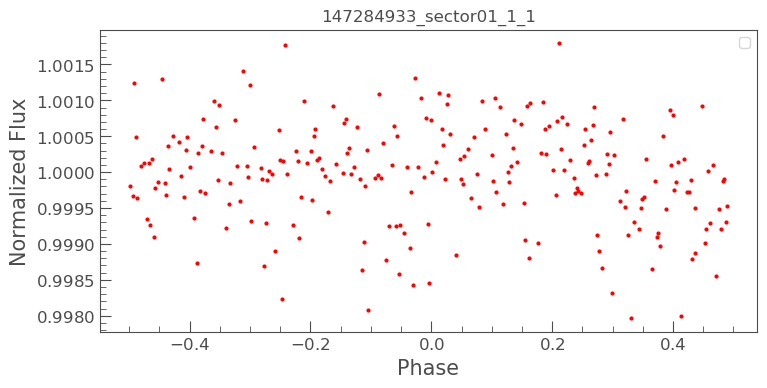

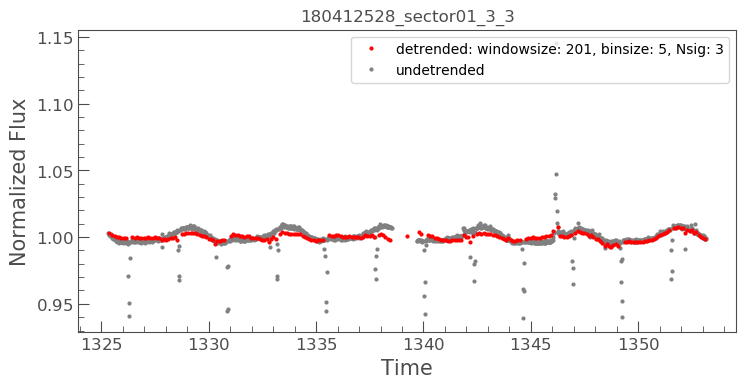

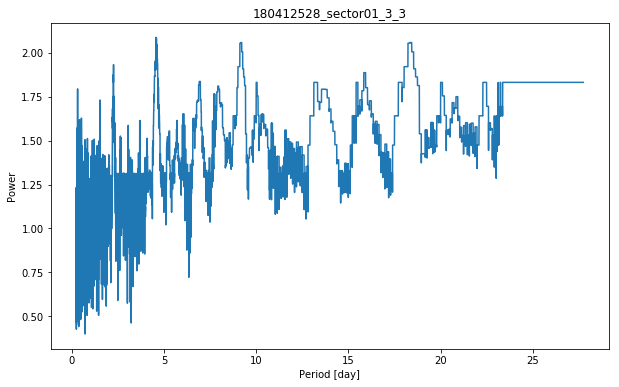

No handles with labels found to put in legend.


Best Fit Period: 4.5660 days


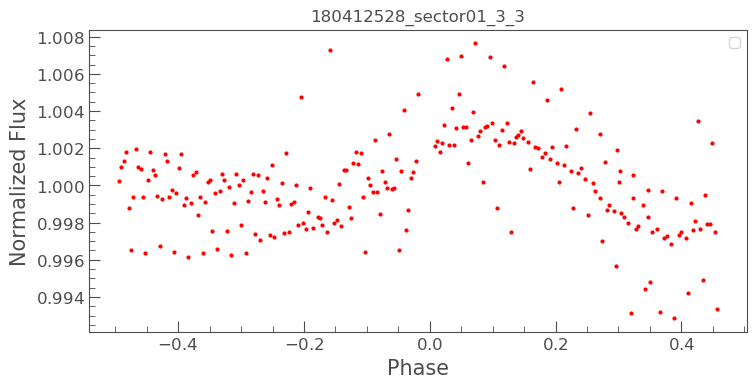

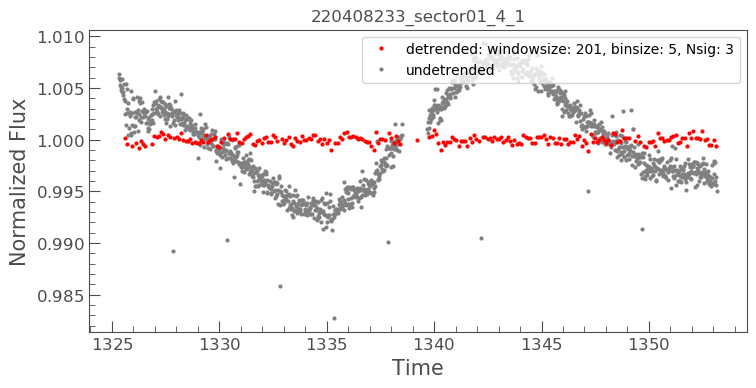

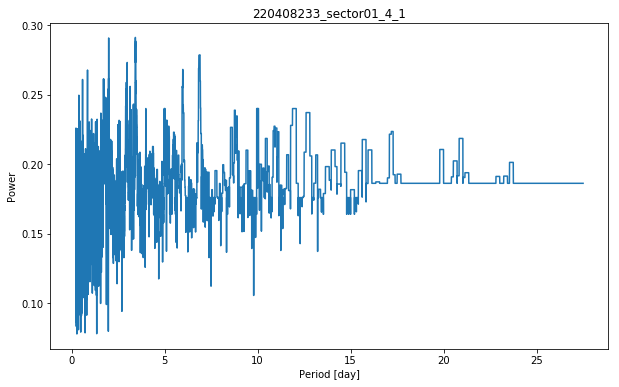

No handles with labels found to put in legend.


Best Fit Period: 3.4350 days


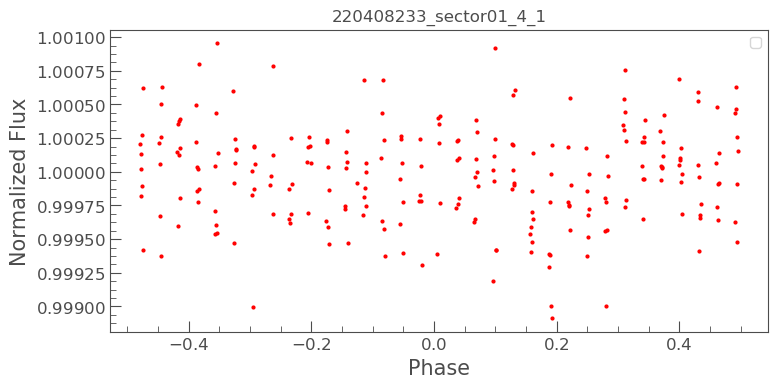

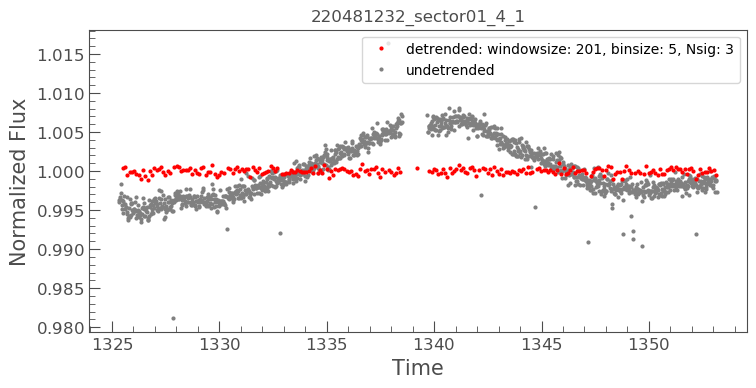

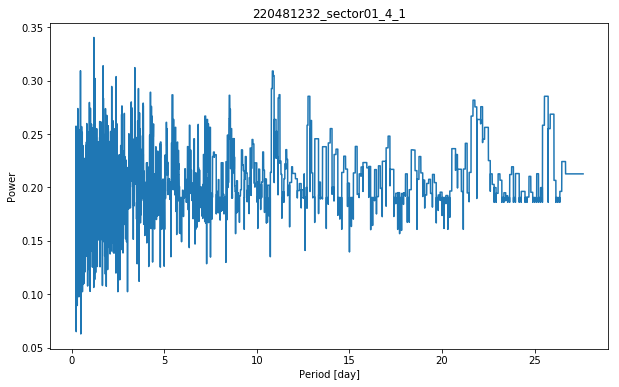

No handles with labels found to put in legend.


Best Fit Period: 1.2050 days


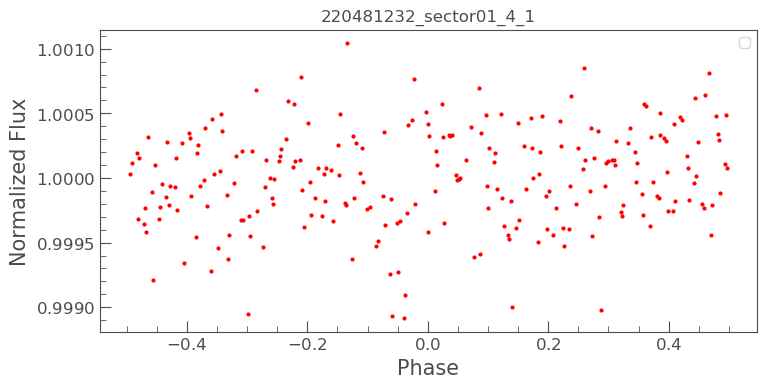

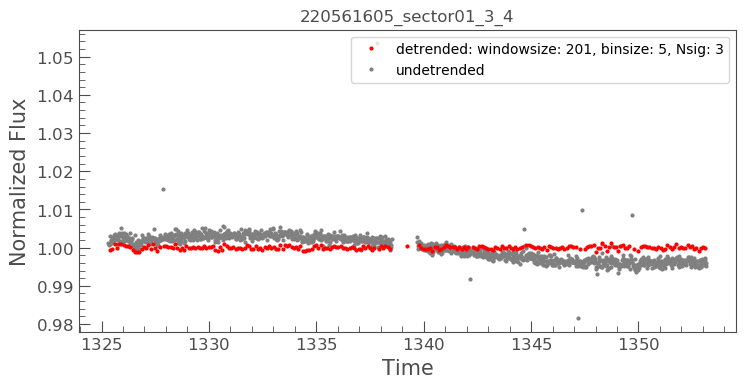

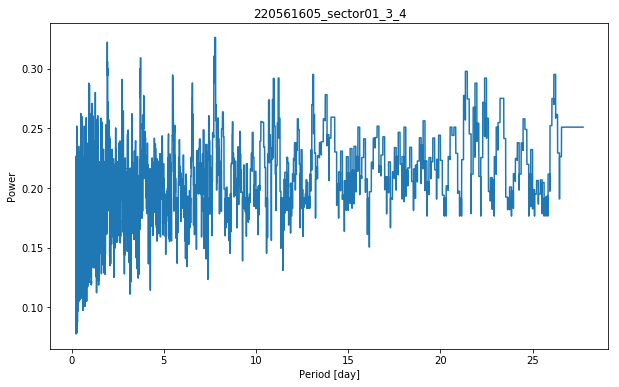

No handles with labels found to put in legend.


Best Fit Period: 7.7620 days


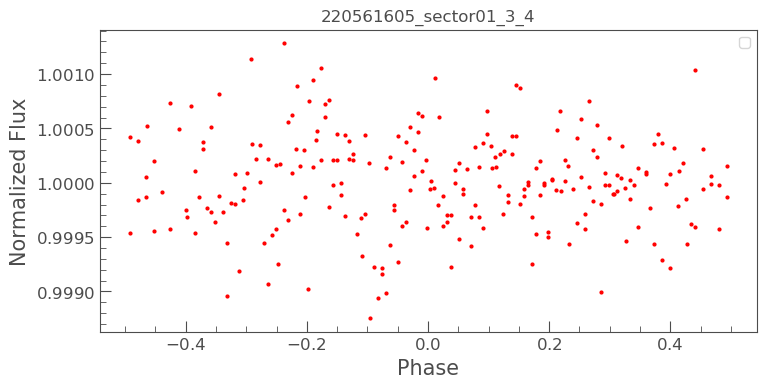

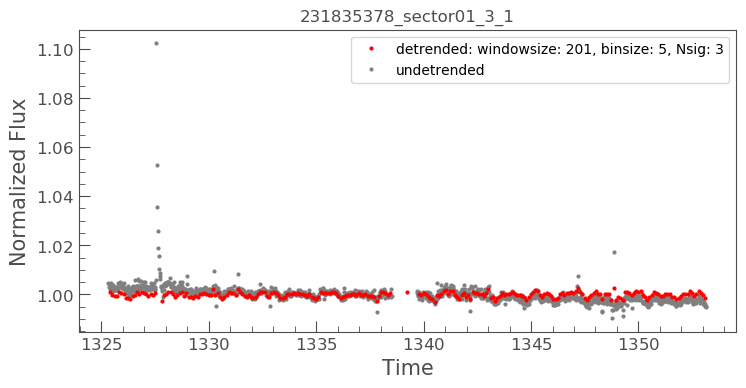

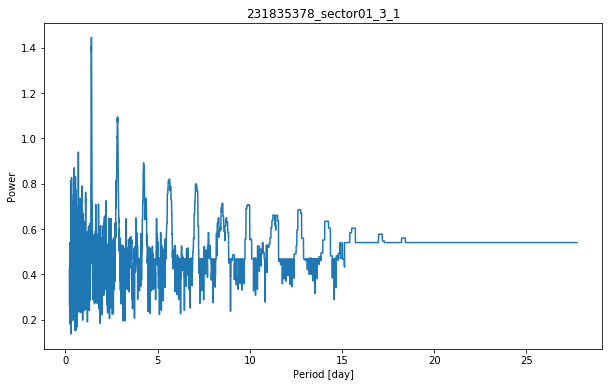

No handles with labels found to put in legend.


Best Fit Period: 1.4130 days


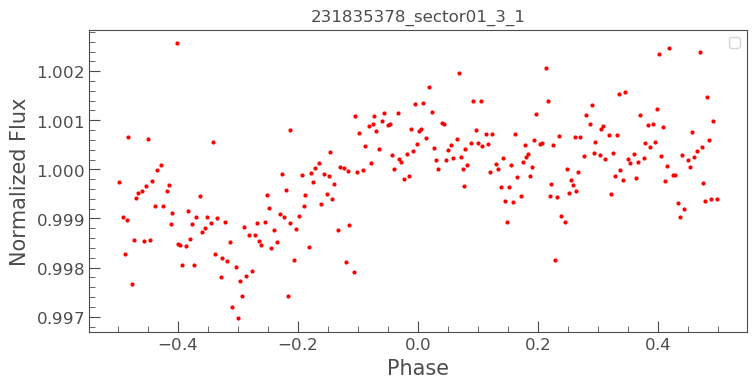

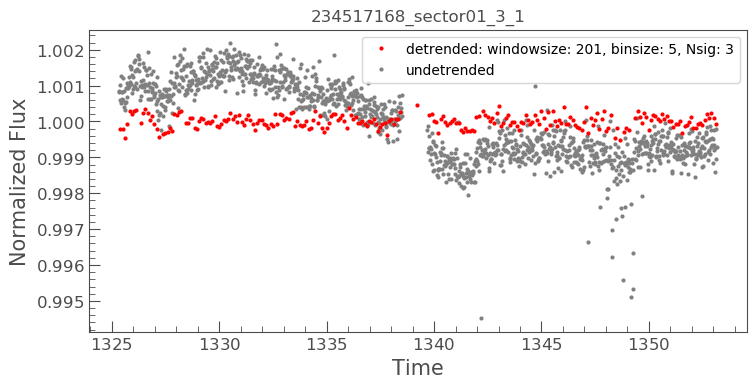

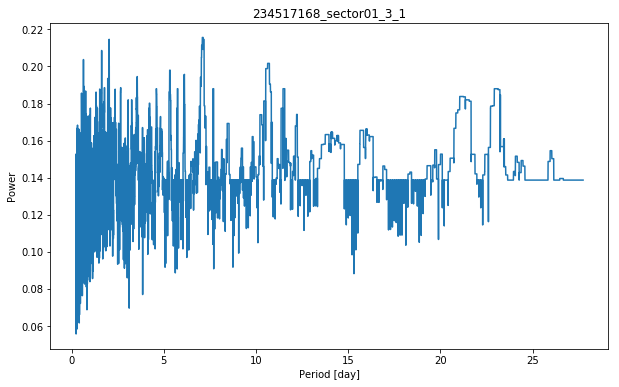

No handles with labels found to put in legend.


Best Fit Period: 7.1180 days


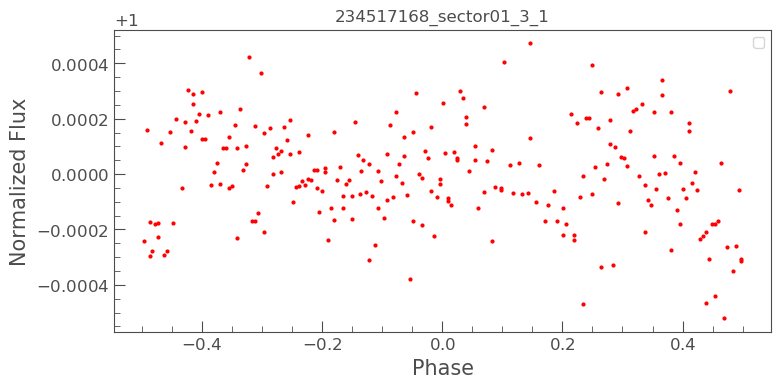

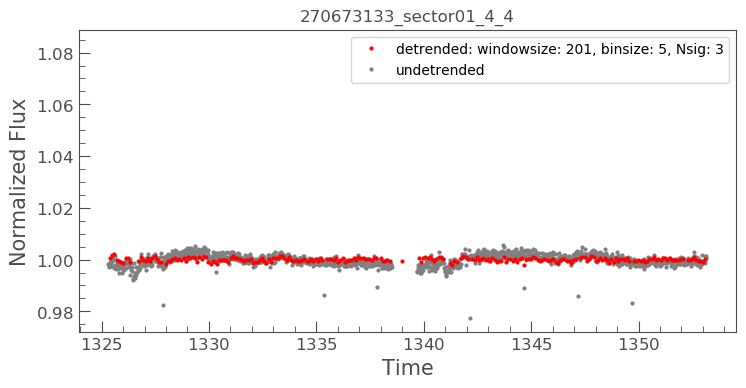

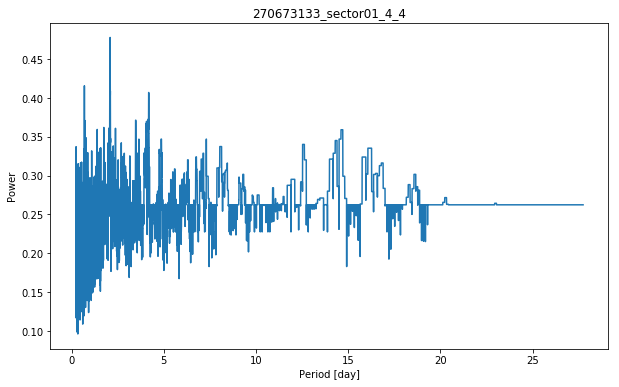

No handles with labels found to put in legend.


Best Fit Period: 2.0890 days


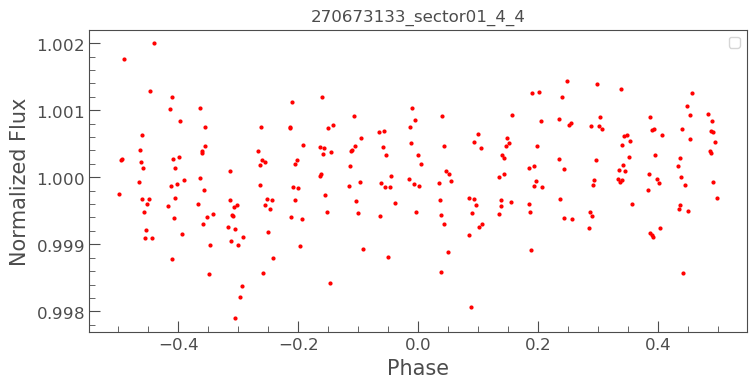

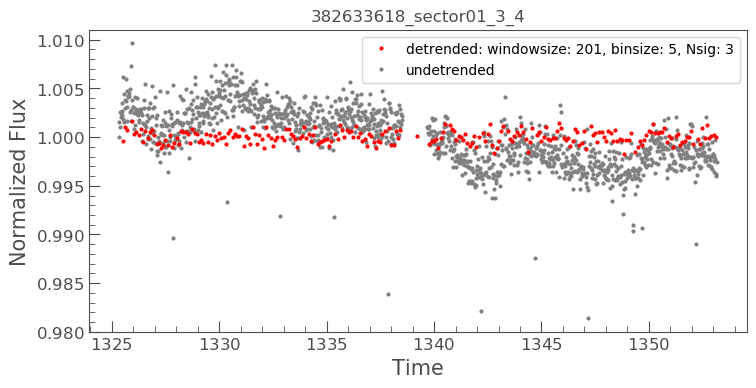

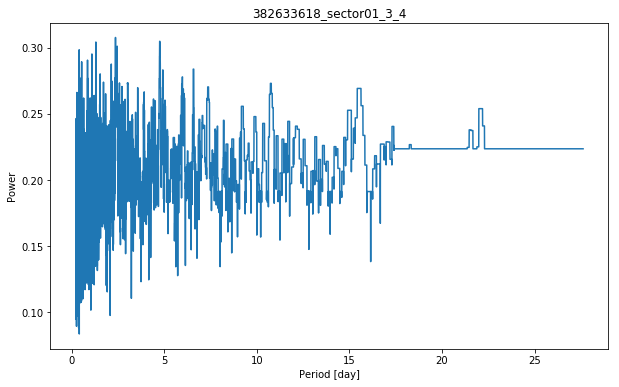

No handles with labels found to put in legend.


Best Fit Period: 2.3670 days


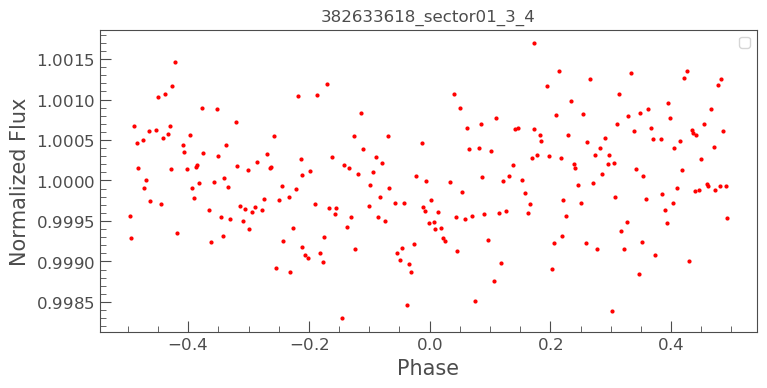

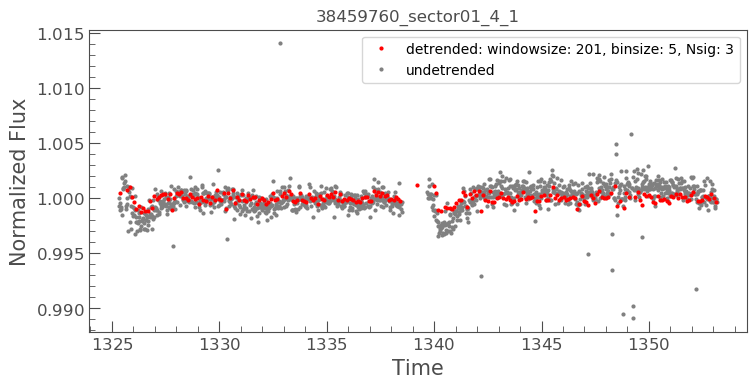

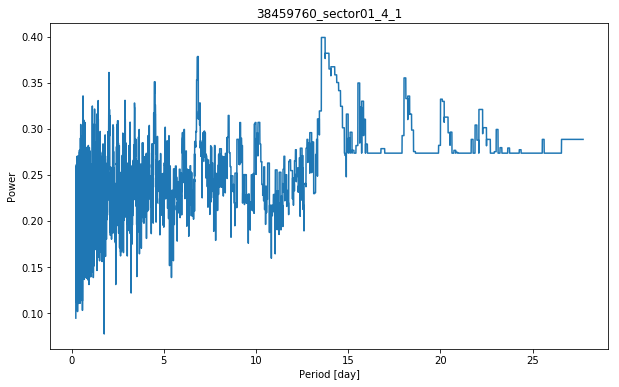

No handles with labels found to put in legend.


Best Fit Period: 13.5440 days


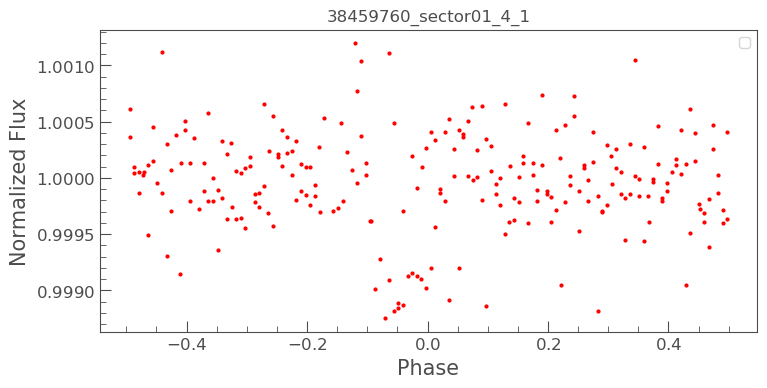

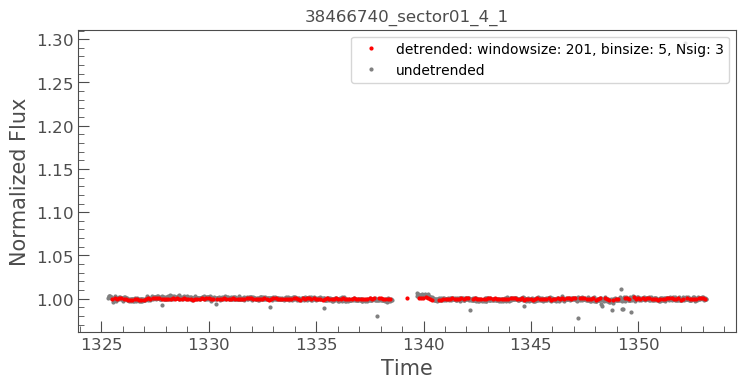

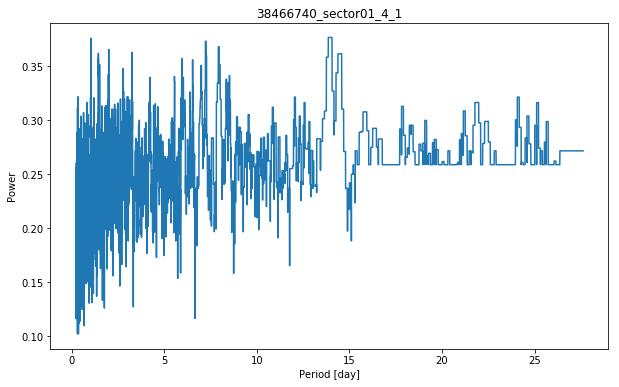

No handles with labels found to put in legend.


Best Fit Period: 13.9570 days


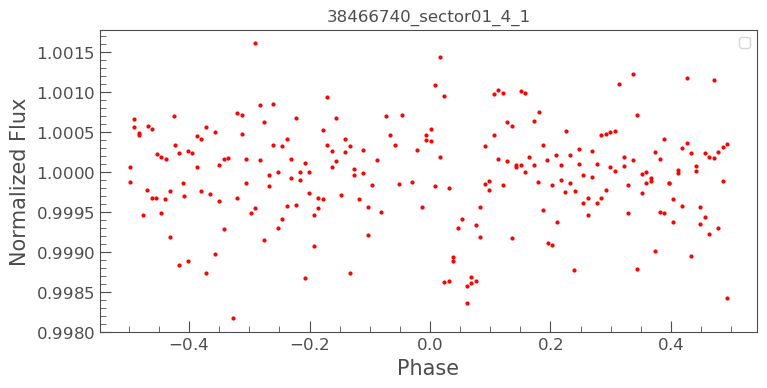

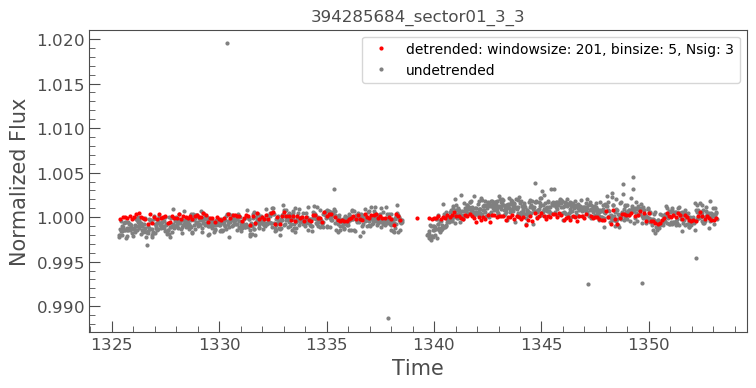

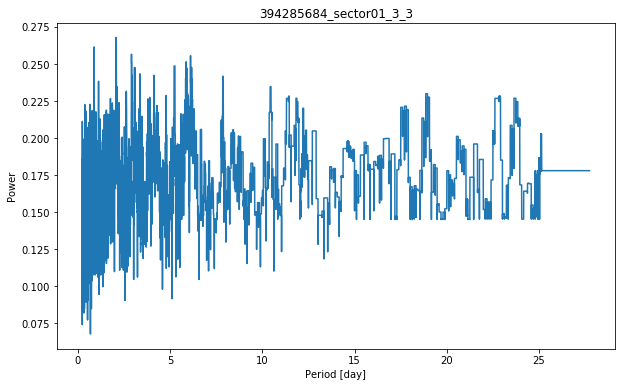

No handles with labels found to put in legend.


Best Fit Period: 2.0680 days


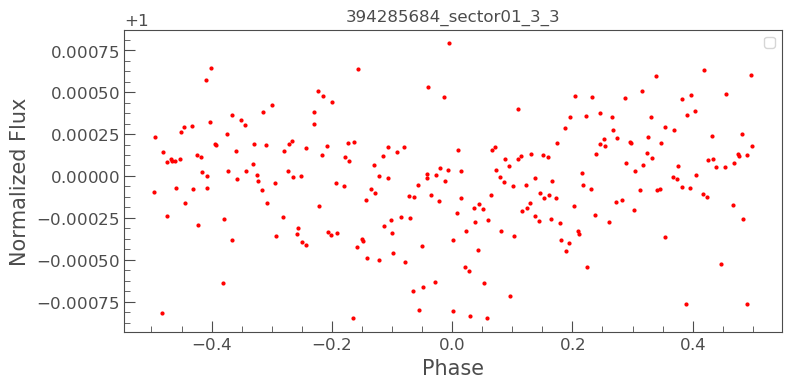

In [45]:
print ("run BLS")
from astropy.stats import BoxLeastSquares

for d in range(len(data)): #creating a for loop to show light curve figures for all files
    time     = np.transpose(np.loadtxt(data[d]))[0] #first  (zero indexing in python) column 
    mag      = np.transpose(np.loadtxt(data[d]))[1] #second (zero indexing in python) column 
    magerror = np.transpose(np.loadtxt(data[d]))[2] #third (zero indexing in python) column 
    

    flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
    fluxerror = flux*(10.0**(magerror/2.5)-1.0)

    lc = lk.LightCurve(time,flux,fluxerror)
    detrended_lc = lc.flatten(window_length=window_size).bin(binsize=bin_size).remove_outliers(sigma=Nsig)
    detrended_lc.plot(c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig));
    plt.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
    plt.legend(loc='upper right')
    plt.title(str(data[d][37:-3]))
    plt.show()
    
    bls = BoxLeastSquares(detrended_lc.time, detrended_lc.flux, detrended_lc.flux_err)
    periods = np.arange(0.23, (max(detrended_lc.time)-min(detrended_lc.time)), 0.001)
    durations = np.arange((1.0/24.0), (5.0/24.0), 0.001) #1 hr to 5 hrs
    periodogram = bls.power(periods, durations,objective='snr')
    plt.figure(figsize=(10,6))
    plt.plot(periodogram.period, periodogram.power)
    plt.ylabel("Power")
    plt.xlabel("Period [day]")
    plt.title(str(data[d][37:-3]))
    plt.show()
    
    
    
    best_fit = periods[np.argmax(periodogram.power)]
    print('Best Fit Period: {:0.4f} days'.format(best_fit))
    
    detrended_lc.fold(best_fit).plot(c='red',markersize=4,marker='.',linestyle='none')
    plt.legend(loc='upper right')
    plt.title(str(data[d][37:-3]))
    plt.show()
    
    print( "") #adds space between figures

In [33]:
print ((max(detrended_lc.time)-min(detrended_lc.time)))
periods = np.arange(0.1, (max(detrended_lc.time)-min(detrended_lc.time)), 0.001); print (periods)


27.739306799999667
[ 0.1    0.101  0.102 ... 27.737 27.738 27.739]


In [42]:
print (5.0/24.0)

0.20833333333333334
